In [2]:
import numpy as np;
import pandas as pd;
import tensorflow as tf;
import matplotlib.pyplot as plt;
import matplotlib.image as mpimg;

In [3]:
import random;
import os;
for dirpath,dirname,filename in os.walk("Ball Classification"):
    print(f"there are {len(dirname)} directories and {len(filename)} images in {dirpath}")

there are 3 directories and 0 images in Ball Classification
there are 26 directories and 0 images in Ball Classification\test
there are 0 directories and 5 images in Ball Classification\test\baseball
there are 0 directories and 5 images in Ball Classification\test\basketball
there are 0 directories and 5 images in Ball Classification\test\beachballs
there are 0 directories and 5 images in Ball Classification\test\billiard ball
there are 0 directories and 5 images in Ball Classification\test\bowling ball
there are 0 directories and 5 images in Ball Classification\test\brass
there are 0 directories and 5 images in Ball Classification\test\buckeyballs
there are 0 directories and 5 images in Ball Classification\test\cannon ball
there are 0 directories and 5 images in Ball Classification\test\cricket ball
there are 0 directories and 5 images in Ball Classification\test\eyeballs
there are 0 directories and 5 images in Ball Classification\test\football
there are 0 directories and 5 images in 

In [4]:
import pathlib;
data_dir=pathlib.Path("./Ball Classification/train")
class_names=np.array(sorted(item.name for item in data_dir.glob("*")))
class_names

array(['baseball', 'basketball', 'beachballs', 'billiard ball',
       'bowling ball', 'brass', 'buckeyballs', 'cannon ball',
       'cricket ball', 'eyeballs', 'football', 'golf ball', 'marble',
       'meat ball', 'medicine ball', 'paint balls', 'pokeman balls',
       'puffballs', 'screwballs', 'soccer ball', 'tennis ball',
       'tether ball', 'volley ball', 'water polo ball', 'wiffle ball',
       'wrecking ball'], dtype='<U15')

the shape of the image is(224, 224, 3)


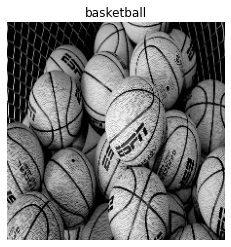

In [28]:
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.axis("off")
    plt.title(target_class)
    plt.imshow(img)
    print(f"the shape of the image is{img.shape}")
    return img
random_image=view_random_image("./Ball Classification/train/","basketball")


In [6]:
from keras.preprocessing.image import ImageDataGenerator;
train_dir="./Ball Classification/train"
test_dir="./Ball Classification/test"
valid_dir="./Ball Classification/valid"
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=0.2,height_shift_range=0.2,width_shift_range=0.2,
                                 zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),batch_size=32,class_mode="categorical",seed=42)
test_data=test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),batch_size=32,class_mode="categorical")
valid_data=valid_datagen.flow_from_directory(directory=valid_dir,target_size=(224,224),batch_size=32,class_mode="categorical")

Found 3051 images belonging to 26 classes.
Found 130 images belonging to 26 classes.
Found 130 images belonging to 26 classes.


In [41]:

tf.random.set_seed(42)
inputs=tf.keras.layers.Input(shape=(224,224,3))
x=tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu")(inputs)
x=tf.keras.layers.Conv2D(10,3,activation="relu")(x)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Conv2D(10,3,activation="relu")(x)
x=tf.keras.layers.Conv2D(10,3,activation="relu")(x)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(128,activation="relu")(x)
outputs=tf.keras.layers.Dense(len(class_names),activation="softmax")(x)
model_1=tf.keras.Model(inputs,outputs)
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [42]:
model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),verbose=1)

Epoch 1/5
96/96 [==============================] - 41s 401ms/step - loss: 2.9540 - accuracy: 0.1616 - val_loss: 2.6623 - val_accuracy: 0.1769
Epoch 2/5
96/96 [==============================] - 37s 381ms/step - loss: 2.3322 - accuracy: 0.3261 - val_loss: 2.1616 - val_accuracy: 0.3538
Epoch 3/5
96/96 [==============================] - 37s 388ms/step - loss: 2.0191 - accuracy: 0.4294 - val_loss: 2.0172 - val_accuracy: 0.4846
Epoch 4/5
96/96 [==============================] - 36s 377ms/step - loss: 1.8510 - accuracy: 0.4684 - val_loss: 1.6194 - val_accuracy: 0.5308
Epoch 5/5
96/96 [==============================] - 37s 384ms/step - loss: 1.7491 - accuracy: 0.4939 - val_loss: 1.4737 - val_accuracy: 0.5462


In [16]:
from tensorflow.keras import mixed_precision;
mixed_precision.set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3070 Laptop GPU, compute capability 8.6


In [39]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=tf.keras.layers.Input(shape=(224,224,3))
x=base_model(inputs,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
outputs=tf.keras.layers.Dense(len(class_names),activation="softmax")(x)
model_2=tf.keras.Model(inputs,outputs)
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [40]:
model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),verbose=1)

Epoch 1/5
96/96 [==============================] - 68s 459ms/step - loss: 0.9850 - accuracy: 0.7240 - val_loss: 0.2734 - val_accuracy: 0.9231
Epoch 2/5
96/96 [==============================] - 38s 399ms/step - loss: 0.2939 - accuracy: 0.9177 - val_loss: 0.1620 - val_accuracy: 0.9462
Epoch 3/5
96/96 [==============================] - 38s 393ms/step - loss: 0.1847 - accuracy: 0.9476 - val_loss: 0.1106 - val_accuracy: 0.9846
Epoch 4/5
96/96 [==============================] - 36s 377ms/step - loss: 0.1871 - accuracy: 0.9453 - val_loss: 0.3096 - val_accuracy: 0.9000
Epoch 5/5
96/96 [==============================] - 36s 369ms/step - loss: 0.1609 - accuracy: 0.9515 - val_loss: 0.1629 - val_accuracy: 0.9462


In [33]:
for layer in model_2.layers:
    layer.trainable=True
    print(layer.name,layer.trainable)

input_12 True
efficientnetb0 True
global_average_pooling2d_3 True
dense_9 True


In [34]:
for layer in model_2.layers[1].layers:
    print(layer.name,layer.trainable)

input_11 True
rescaling_3 True
normalization_3 True
stem_conv_pad True
stem_conv True
stem_bn True
stem_activation True
block1a_dwconv True
block1a_bn True
block1a_activation True
block1a_se_squeeze True
block1a_se_reshape True
block1a_se_reduce True
block1a_se_expand True
block1a_se_excite True
block1a_project_conv True
block1a_project_bn True
block2a_expand_conv True
block2a_expand_bn True
block2a_expand_activation True
block2a_dwconv_pad True
block2a_dwconv True
block2a_bn True
block2a_activation True
block2a_se_squeeze True
block2a_se_reshape True
block2a_se_reduce True
block2a_se_expand True
block2a_se_excite True
block2a_project_conv True
block2a_project_bn True
block2b_expand_conv True
block2b_expand_bn True
block2b_expand_activation True
block2b_dwconv True
block2b_bn True
block2b_activation True
block2b_se_squeeze True
block2b_se_reshape True
block2b_se_reduce True
block2b_se_expand True
block2b_se_excite True
block2b_project_conv True
block2b_project_bn True
block2b_drop True

In [68]:
def load_and_prep_image(filename,img_shape=224):
    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img)
    img=tf.image.resize(img,size=[img_shape,img_shape])
    img=img/255.
    return img
def pred_and_plot(model,filename,class_name=class_names):
    img = load_and_prep_image(filename)
    pred=model.predict(tf.expand_dims(img,axis=0))
    if len(pred[0])>1:
        pred_class=class_name[tf.argmax(pred[0])]
    else:
        pred_class=class_name[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f"Prediction:{pred_class}")
    plt.axis("off")
    print(pred)

[[4.178e-02 4.153e-02 1.541e-03 2.987e-04 1.533e-02 1.973e-01 1.262e-04
  3.717e-02 3.283e-04 4.324e-01 3.023e-04 1.535e-04 6.360e-02 1.365e-02
  1.950e-03 3.006e-03 2.937e-03 7.549e-03 3.571e-02 1.987e-04 3.145e-03
  8.125e-03 3.250e-02 1.084e-04 3.120e-03 5.606e-02]]


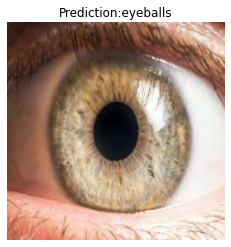

In [82]:
predicted_image=pred_and_plot(model_1,"./eyeballs.jpg")

[[5.805e-05 1.160e-03 6.312e-05 3.899e-03 6.557e-07 9.537e-07 1.177e-04
  0.000e+00 1.192e-07 5.960e-08 8.404e-06 0.000e+00 1.046e-04 2.558e-04
  5.364e-07 1.440e-04 1.127e-05 0.000e+00 5.960e-08 6.020e-06 7.319e-05
  9.247e-03 5.875e-04 9.844e-01 1.228e-05 0.000e+00]]


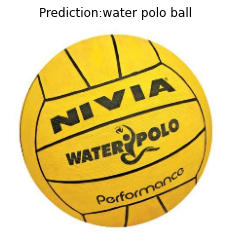

In [83]:
img2=pred_and_plot(model_1,"./watyer polo ball.jpg")